## Tarea 1 - Física Computacional
**Román Tamez Vidal Tamayo Tamez** - (tamoaltas)

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

### Problema 1
Realice una función que implemente el algoritmo de la raíz cuadrada de un número hasta la cifra *n* y que vaya imprimiendo cada una de las aproximaciones.

In [2]:
def siguiente_digito(dividendo, cola):
  '''
  Obtiene 'd' entre 0 y 9 de manera que (int(cola)*10 + (d+1))*(d+1) > dividendo.
  Se regresa:
  d ,  dividendo - (int(cola)*10 + d)*d
  '''
  dividendo = int(dividendo)
  cola = int(cola)

  for digito in range(1,11):
      test = (cola*10 + digito)*digito

      if test > dividendo:
        d = digito - 1
        res = dividendo - (cola*10 + d)*d
        return d, res

  print('Algo salio mal...')
  return None, None

In [3]:
def formato_ceros_punto(digitos, pos_punto):
  if len(digitos) <= pos_punto:
    # Se agregan ceros enteros si faltan
    return digitos + '0'*(pos_punto - len(digitos))
  else:
    # Se coloca el punto
    return digitos[:pos_punto] + '.' + digitos[pos_punto:]

In [4]:
def raiz(n, num_digitos):
  # Se convierte n a un float por comodidad
  if type(n) == int:
    n = float(n)
    n_es_entero = True
  else:
    n_es_entero = False

  n_str = str(n)
  i_punto = n_str.find('.')
  enteros, decimales = [], []

  # Se obtienen los pares de enteros antes del punto decimal
  for i in range(i_punto - 1, -1  , -2):
    if i == 0:
      enteros.append(str(n_str[i]))
    else:
      enteros.append(str(n_str[i - 1]) + str(n_str[i]))

  if (not n_es_entero):
    # Se borra el cero si no hay enteros
    if n_str[0] == '0' and i_punto == 1:
      enteros = []

    # Se obtienen los pares de decimales después del punto decimal
    for i in range(i_punto + 1, len(n_str), 2):
      if i == len(n_str) - 1:
        decimales.append(str(n_str[i]) + '0')
      else:
        decimales.append(str(n_str[i]) + str(n_str[i + 1]) )

  enteros = enteros[::-1] # Se invierte el orden de los elementos
  print(enteros, '.',decimales)

  # Todos los pares de dígitos + extras para más dígitos
  # Operar sobre cada par resultará en un dígito más para la aproximación
  fifo = enteros + decimales + ['00']*(num_digitos - len(enteros) - len(decimales))
  print(fifo)

  pos_punto = len(enteros)
  n_digits = len(enteros) + len(decimales)

  digitos = '' # Digitos de la aproximación
  res = 0 # Residuo tras la 'división'
  cola = 0 # 2 + int(digitos)
  for i in range(num_digitos):
    dividendo = str(res) + fifo[i] # El siguiente número a 'dividir'

    # Se calcula el siguiente digito y el residuo
    digito, res = siguiente_digito(dividendo, cola)

    if res == 0 and i >= n_digits:
      print('Se ha llegado a una raíz exacta')
      break

    digitos += str(digito)
    cola = int(digitos) * 2

    print('Aproximación:', formato_ceros_punto(digitos, pos_punto))

  raiz_str = formato_ceros_punto(digitos, pos_punto)
  if raiz_str.find('.') == -1: # No hay punto decimal
    return int(raiz_str)
  else:
    return float(raiz_str)

In [5]:
print(raiz(225,3))
print('-----------------------------------')
print(raiz(225,1))
print('-----------------------------------')
print(raiz(2,8))
print('-----------------------------------')
print(raiz(16.3216,4))
print('-----------------------------------')
print(raiz(0.00642,4))

['2', '25'] . []
['2', '25', '00']
Aproximación: 10
Aproximación: 15
Se ha llegado a una raíz exacta
15
-----------------------------------
['2', '25'] . []
['2', '25']
Aproximación: 10
10
-----------------------------------
['2'] . []
['2', '00', '00', '00', '00', '00', '00', '00']
Aproximación: 1
Aproximación: 1.4
Aproximación: 1.41
Aproximación: 1.414
Aproximación: 1.4142
Aproximación: 1.41421
Aproximación: 1.414213
Aproximación: 1.4142135
1.4142135
-----------------------------------
['16'] . ['32', '16']
['16', '32', '16', '00']
Aproximación: 4
Aproximación: 4.0
Aproximación: 4.04
Se ha llegado a una raíz exacta
4.04
-----------------------------------
[] . ['00', '64', '20']
['00', '64', '20', '00']
Aproximación: .0
Aproximación: .08
Aproximación: .080
Aproximación: .0801
0.0801


### Problema 2
Haga la gráfica de la función $ f(x) = \cot(x) $ en el intervalo $[-4\pi, 4\pi]$. La gráfica no debe tener líneas verticales.

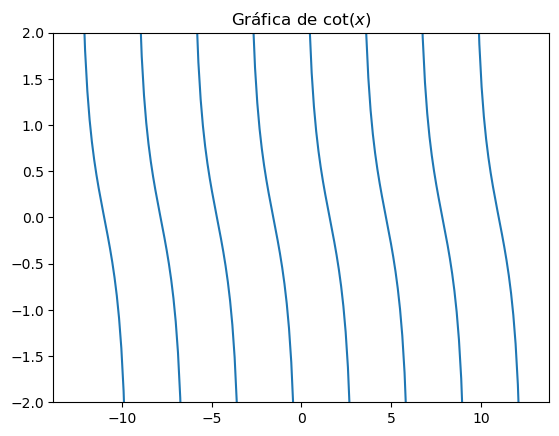

In [6]:
x = np.linspace(-4*np.pi, 4*np.pi, 200)
y = np.cos(x)/np.sin(x)

'''
cot(x) es decreciente en los intervalos continuos. 
Si se encuentra una diferencia positiva entre 
f_{n} y f_{n-1}, es porque se cruzó una discontinuidad.
'''
for i in range(1,len(y)):
    diff = y[i] - y[i-1]
    if diff > 0:
        y[i-1] = np.nan

plt.title(r'Gráfica de ${\rm cot}(x)$')
plt.plot(x,y)
plt.ylim(-2,2)
plt.show()

### Problema 3

Genere una función y la gráfica de:

$$
f(x) = \begin{cases} 
1, & \text{si } x \in [n, n+1) \text{ con } n \text{ par} \\ 
0, & \text{si } x \in [n, n+1) \text{ con } n \text{ impar} 
\end{cases} 
$$

donde $ n $ es la parte entera de $ x $.

In [7]:
def onda_cuadrado_par_impar(x):
    # math.floor() regresa la parte entera de un número
    if m.floor(x) % 2 == 1:
        return 0
    else:
        return 1

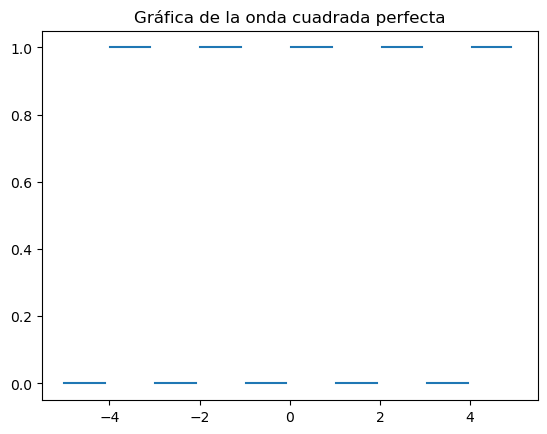

In [8]:
x = np.linspace(-5,5, 200)

# Se construye el arreglo de las y 
y = np.zeros_like(x)
for i in range(len(y)):
    y[i] = onda_cuadrado_par_impar(x[i])

'''
Si dos números consecutivos no tienen la misma parte entera
hubo un salto.
'''
for i in range(1,len(y)):
    if m.floor(y[i]) != m.floor(y[i-1]):
        y[i-1] = np.nan

plt.title(r'Gráfica de la onda cuadrada perfecta')
plt.plot(x,y)
plt.show()

### Problema 4

Realice la gráfica de:

$ f(x) = \sum_{n=0}^{N} \frac{(-1)^n}{(2n+1)^2} \sin((2n+1)x) $

para $ N = 3,\, 5,\, 10,\, 20,\, 30 $.


In [9]:
def serie_onda_triangular_arreglos(xs, NN):
    # Se generan los coefs
    coefs = np.zeros(NN + 1)
    for n in range(NN + 1):
        coefs[n] = (-1)**n / (2*n + 1)**2

    f = np.zeros_like(xs)
    for i in range(len(xs)): # Se calcula el valor de la serie para cada punto
        f[i] = sum(coefs[n]*m.sin((2*n + 1)*xs[i]) for n in range(NN + 1))
    return f

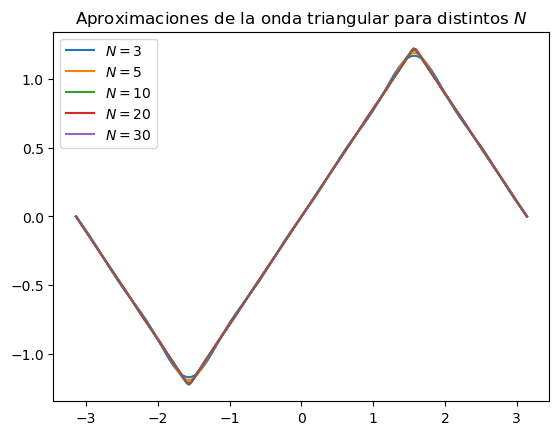

In [10]:
x = np.linspace(-np.pi,np.pi, 200)

# Se grafica cada aproximación de la onda triangular
valores_NN = [3, 5, 10, 20, 30]
for NN in valores_NN:
    y = serie_onda_triangular_arreglos(x, NN)
    plt.plot(x, y, label=r'$N =  %i $' % NN)

plt.title(r'Aproximaciones de la onda triangular para distintos $N$')
plt.plot(x,y)
plt.legend()
plt.show()

### Problema 5
Utilice las bibliotecas de `scipy` para realizar las siguientes gráficas:

- La función de Airy $ Ai(x) $ en el intervalo $[-20,\, 10]$.
- Función de Bessel de primera especie $ J_n(x) $ para $ n = 0,\, 1,\, 2,\, 3 $.
- Función esférica de Bessel de primera especie $ j_n(x) $ para $ n = 0,\, 1,\, 2,\, 3 $.

In [11]:
import scipy as sp

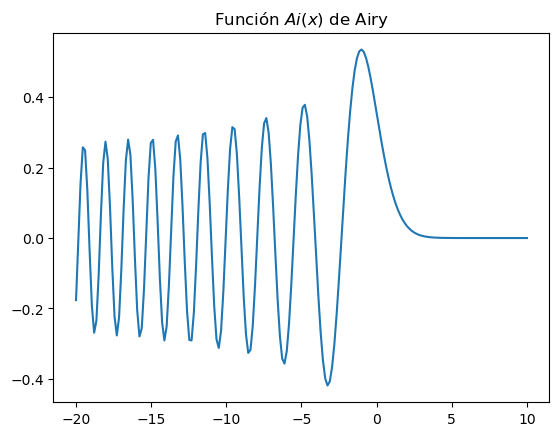

In [12]:
x = np.linspace(-20,10,200)
ai = sp.special.airy(x)[0]

plt.title(r'Función $Ai(x)$ de Airy')
plt.plot(x,ai)
plt.show()

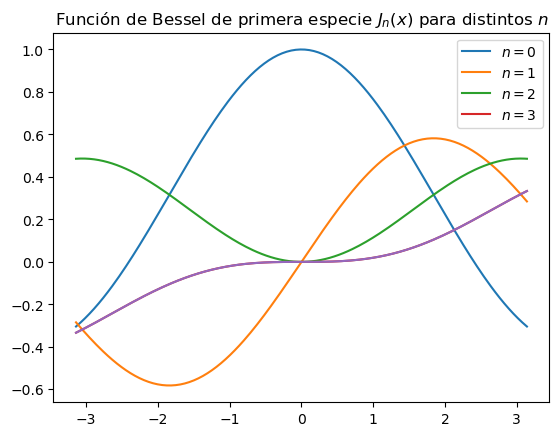

In [13]:
x = np.linspace(-np.pi,np.pi, 200)

for i in range(4):
    y = sp.special.jv(i,x)
    plt.plot(x, y, label=r'$n =  %i $' % i)

plt.title(r'Función de Bessel de primera especie $ J_n(x) $ para distintos $n$')
plt.plot(x,y)
plt.legend()
plt.show()

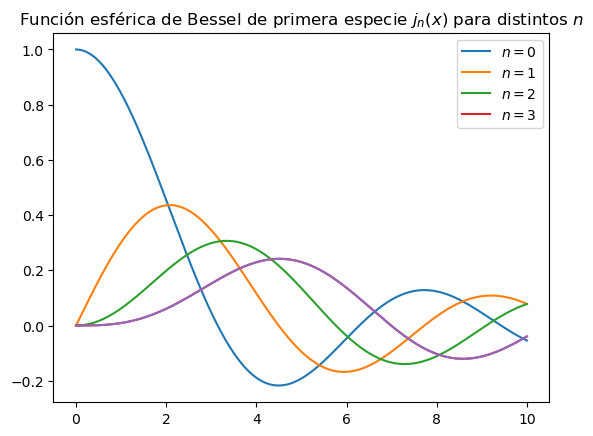

In [14]:
x = np.linspace(0,10, 200)

for i in range(4):
    y = sp.special.spherical_jn(i,x)
    plt.plot(x, y, label=r'$n =  %i $' % i)

plt.title(r'Función esférica de Bessel de primera especie $ j_n(x) $ para distintos $n$')
plt.plot(x,y)
plt.legend()
plt.show()